In [1]:
import os
import openai
import pandas as pd
import time

# OpenAI API 키 설정
openai.api_key = ""

# 데이터 폴더 경로
data_folder_path = "./뱅뱅막국수_combined_reviews.csv""

# 폴더 내 모든 CSV 파일 가져오기
file_list = [f for f in os.listdir(data_folder_path) if f.endswith('.csv')]

# 파일마다 감성 분석 수행
for file_name in file_list:
    review_file_path = os.path.join(data_folder_path, file_name)
    reviews_df = pd.read_csv(review_file_path)

    # 감성 분석 결과를 저장할 리스트
    sentiments = []

    # 리뷰마다 감성 분석 수행
    for review_text in reviews_df['Review']:  # 컬럼명이 'Review'라고 가정
        try:
            # 최신 ChatCompletion 모델을 사용한 감성 분석
            response = openai.ChatCompletion.create(
                model="gpt-3.5-turbo-1106",
                messages=[
                    {"role": "system", "content": "당신은 감성 분석을 전문으로 하는 도움말 어시스턴트입니다. 문맥이 없는 단어(예: '좋아요', '별로예요')만 있는 경우, 단어의 감성에 따라 '긍정적' 또는 '부정적'으로 응답하세요."},
                    {"role": "user", "content": f"다음 리뷰의 감성을 분석하여 '긍정적' 또는 '부정적' 형식으로만 응답해 주세요: '{review_text}'"}
                ],
                max_tokens=20,  # 응답 길이를 줄입니다.
                temperature=0.2
            )
            
            # API 응답에서 감성 분석 결과 추출
            response_text = response.choices[0].message['content'].strip()
            if "긍정적" in response_text:
                sentiment = "긍정적"
            elif "부정적" in response_text:
                sentiment = "부정적"
            else:
                sentiment = "알 수 없음"
            
            sentiments.append(sentiment)
            
        except Exception as e:
            print(f"리뷰 처리 중 오류 발생: {e}")
            sentiments.append("오류")
            time.sleep(1)  # 오류 발생 시 잠시 대기
        
        # 요청 빈도 제어
        time.sleep(0.5)  # 각 요청 사이에 대기 시간 추가

    # 결과를 데이터프레임에 추가
    reviews_df['sentiment'] = sentiments

    # 원본 파일 이름에 "_분석" 추가하여 저장
    #base_name = os.path.splitext(file_name)[0]
    #output_path = f"./data/{base_name}_분석.csv"
    #reviews_df.to_csv(output_path, index=False)
    print("감성 분석 완료")

NotADirectoryError: [WinError 267] 디렉터리 이름이 올바르지 않습니다: './한강수_combined_reviews.csv'

In [1]:
import os
import openai
import pandas as pd
import time

# OpenAI API 키 설정
openai.api_key =
# 분석할 파일 경로를 직접 지정
review_file_path = "./뱅뱅막국수_combined_reviews.csv"

# CSV 파일 읽기
reviews_df = pd.read_csv(review_file_path)

# 감성 분석 결과를 저장할 리스트
sentiments = []

# 리뷰마다 감성 분석 수행
for review_text in reviews_df['Review']:  # 컬럼명이 'Review'라고 가정
    try:
        # 최신 ChatCompletion 모델을 사용한 감성 분석
        response = openai.ChatCompletion.create(
            model="gpt-3.5-turbo-1106",
            messages=[
                {"role": "system", "content": "당신은 감성 분석을 전문으로 하는 도움말 어시스턴트입니다. 문맥이 없는 단어(예: '좋아요', '별로예요')만 있는 경우, 단어의 감성에 따라 '긍정적' 또는 '부정적'으로 응답하세요."},
                {"role": "user", "content": f"다음 리뷰의 감성을 분석하여 '긍정적' 또는 '부정적' 형식으로만 응답해 주세요: '{review_text}'"}
            ],
            max_tokens=20,  # 응답 길이를 줄입니다.
            temperature=0.2
        )
        
        # API 응답에서 감성 분석 결과 추출
        response_text = response.choices[0].message['content'].strip()
        if "긍정적" in response_text:
            sentiment = "긍정적"
        elif "부정적" in response_text:
            sentiment = "부정적"
        else:
            sentiment = "알 수 없음"
        
        sentiments.append(sentiment)
        
    except Exception as e:
        print(f"리뷰 처리 중 오류 발생: {e}")
        sentiments.append("오류")
        time.sleep(1)  # 오류 발생 시 잠시 대기
    
    # 요청 빈도 제어
    time.sleep(0.5)  # 각 요청 사이에 대기 시간 추가

# 결과를 데이터프레임에 추가
reviews_df['sentiment'] = sentiments

# 분석 결과를 저장할 경로 지정
#output_path = "./한강수_combined_reviews_분석.csv"
#reviews_df.to_csv(output_path, index=False)

print("감정 분석 완료")


감정 분석 완료


In [2]:
reviews_df.to_csv('뱅뱅막국수_combined_reviews_감정분석완료', index=False, encoding='utf-8-sig')


In [3]:
data = pd.read_csv('./뱅뱅막국수_combined_reviews_감정분석완료')
data

,Date,Review,sentiment
0,2주 전,막국수의 대가🌟🌟🌟🌟🌟\n배가 작은거에 한탄하며 모든 음식을 먹지 못해 슬플 정도....,부정적
1,3달 전,"들기름막국수, 참기름막국수, 코다리막국수를 먹었는데 3개 메뉴 모두 맛있었어요. 국...",긍정적
2,4달 전,유명한 곳이라 와봤는데 맛있고 친절하고 유명한 이유를 알겠네요^-^\n코다리랑 참기...,긍정적
3,4달 전,"강남 뱅뱅사거리에서 막국수로 유명한 맛집입니다. 들기름막국수 강추해요. 물막국수, ...",긍정적
4,4달 전,"여긴 진짜 참기름막국수!!!!!!!! 정말 맛있습니다. 막국수 별로 안좋아해서,, ...",긍정적
...,...,...,...
1435,2024-07,쿨타이차면 꼭 들리는 막국수집이에요!\n참기름 들기름 넘넘맛잇어요\n군만두까지 든든...,긍정적
1436,2024-07,유명해서 왔는데 왜 유명한지 알 것 같은 맛..!\n맛있게 잘 먹었습니다 :),긍정적
1437,2024-07,"회사 근처에 이런 맛집 있어서 좋아요. 참기름 막국수, 들기름 막국수, 물막국수 다...",긍정적
1438,2024-07,직장 동료와 방문했는데 맛있게 잘 먹었습니다 !!!참기름 막국수 맛있어용 ㅎㅎㅎ,긍정적


In [4]:
data['sentiment'].unique()

array(['부정적', '긍정적', '알 수 없음'], dtype=object)

In [5]:
data[data['sentiment']=='알 수 없음']

,Date,Review,sentiment
211,2024-09,NaN,알 수 없음
218,2024-08,NaN,알 수 없음
220,2024-08,NaN,알 수 없음
223,2024-08,NaN,알 수 없음
224,2024-07,NaN,알 수 없음
241,2024-05,NaN,알 수 없음
249,2024-03,NaN,알 수 없음
256,2024-02,NaN,알 수 없음
258,2024-01,NaN,알 수 없음
272,2023-10,NaN,알 수 없음


In [6]:
data = data[data['sentiment'] != '알 수 없음']
data

,Date,Review,sentiment
0,2주 전,막국수의 대가🌟🌟🌟🌟🌟\n배가 작은거에 한탄하며 모든 음식을 먹지 못해 슬플 정도....,부정적
1,3달 전,"들기름막국수, 참기름막국수, 코다리막국수를 먹었는데 3개 메뉴 모두 맛있었어요. 국...",긍정적
2,4달 전,유명한 곳이라 와봤는데 맛있고 친절하고 유명한 이유를 알겠네요^-^\n코다리랑 참기...,긍정적
3,4달 전,"강남 뱅뱅사거리에서 막국수로 유명한 맛집입니다. 들기름막국수 강추해요. 물막국수, ...",긍정적
4,4달 전,"여긴 진짜 참기름막국수!!!!!!!! 정말 맛있습니다. 막국수 별로 안좋아해서,, ...",긍정적
...,...,...,...
1435,2024-07,쿨타이차면 꼭 들리는 막국수집이에요!\n참기름 들기름 넘넘맛잇어요\n군만두까지 든든...,긍정적
1436,2024-07,유명해서 왔는데 왜 유명한지 알 것 같은 맛..!\n맛있게 잘 먹었습니다 :),긍정적
1437,2024-07,"회사 근처에 이런 맛집 있어서 좋아요. 참기름 막국수, 들기름 막국수, 물막국수 다...",긍정적
1438,2024-07,직장 동료와 방문했는데 맛있게 잘 먹었습니다 !!!참기름 막국수 맛있어용 ㅎㅎㅎ,긍정적


In [7]:
data['sentiment'].value_counts()

sentiment
긍정적    1328
부정적      60
Name: count, dtype: int64

In [9]:
data.to_csv('뱅뱅막국수_combined_reviews_감정분석완료', index=False, encoding='utf-8-sig')


In [10]:
data

,Date,Review,sentiment
0,2주 전,막국수의 대가🌟🌟🌟🌟🌟\n배가 작은거에 한탄하며 모든 음식을 먹지 못해 슬플 정도....,부정적
1,3달 전,"들기름막국수, 참기름막국수, 코다리막국수를 먹었는데 3개 메뉴 모두 맛있었어요. 국...",긍정적
2,4달 전,유명한 곳이라 와봤는데 맛있고 친절하고 유명한 이유를 알겠네요^-^\n코다리랑 참기...,긍정적
3,4달 전,"강남 뱅뱅사거리에서 막국수로 유명한 맛집입니다. 들기름막국수 강추해요. 물막국수, ...",긍정적
4,4달 전,"여긴 진짜 참기름막국수!!!!!!!! 정말 맛있습니다. 막국수 별로 안좋아해서,, ...",긍정적
...,...,...,...
1435,2024-07,쿨타이차면 꼭 들리는 막국수집이에요!\n참기름 들기름 넘넘맛잇어요\n군만두까지 든든...,긍정적
1436,2024-07,유명해서 왔는데 왜 유명한지 알 것 같은 맛..!\n맛있게 잘 먹었습니다 :),긍정적
1437,2024-07,"회사 근처에 이런 맛집 있어서 좋아요. 참기름 막국수, 들기름 막국수, 물막국수 다...",긍정적
1438,2024-07,직장 동료와 방문했는데 맛있게 잘 먹었습니다 !!!참기름 막국수 맛있어용 ㅎㅎㅎ,긍정적


In [12]:
!pip install matplotlib wordcloud

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   -------------------- ------------------- 3.9/7.8 MB 18.1 MB/s eta 0:00:01
   ---------------------------------------- 7.8/7.8 MB 26.9 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 60.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 2.6/2.6 MB 74.3 MB/s eta 0:00:00


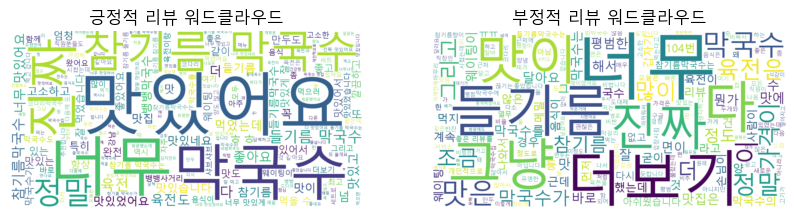

In [11]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 긍정적 리뷰 텍스트 결합
positive_reviews = " ".join(data[data['sentiment'] == '긍정적']['Review'].dropna())

# 부정적 리뷰 텍스트 결합
negative_reviews = " ".join(data[data['sentiment'] == '부정적']['Review'].dropna())

# 한글 폰트 경로 설정 (사용할 폰트 경로로 변경하세요)
font_path = 'C:/Windows/Fonts/malgun.ttf'  # Windows에서 맑은 고딕 폰트 경로 예시입니다.

# 워드클라우드 생성
wordcloud_positive = WordCloud(width=1200, height=600, background_color='white', font_path=font_path).generate(positive_reviews)
wordcloud_negative = WordCloud(width=1200, height=600, background_color='white', font_path=font_path).generate(negative_reviews)

# 한글 폰트 설정 (matplotlib용)
plt.rc('font', family='Malgun Gothic')  # 폰트 이름이 올바르게 설정되어야 합니다.

# 시각화
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('긍정적 리뷰 워드클라우드')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('부정적 리뷰 워드클라우드')

plt.show()


In [25]:
data[data['sentiment']=='부정적']

,Date,Review,sentiment
0,2주 전,막국수의 대가🌟🌟🌟🌟🌟\n배가 작은거에 한탄하며 모든 음식을 먹지 못해 슬플 정도....,부정적
11,6달 전,일행은 코다리 막국수를 시키고 저는 들기름 막국수를 시켰어요. 일요일 두시 넘어 방...,부정적
21,8달 전,면이 뚝뚝 끊기는 함량이 높아보여요. 참기름향이 고소한 막국수입니다. 마지막 황태육...,부정적
62,2주 전,맛있다고 하여 불금 저녁시간에 찾아간 가게인데요. 가게 광고 사진 찍느라고 가게가 ...,부정적
89,2년 전,"주변직장인들이 많아서 11시30분이후에가면 매장밖에까지 줄 서있음. 세트가격13,0...",부정적
94,2년 전,평일 점심시간에 늘 웨이팅이 있는 듯합니다. 식당 문 앞에 주문 및 대기신청 시스템...,부정적
106,6달 전,이 동네 물가를 생각하면 가격은 어쩔 수 없음\n맛은 다녀본 중 수준급!,부정적
110,6달 전,가격이 너무 비쌉니다 만이천원 퀄리티가 아닙니다. 좌석 간격도 비좁은데 반찬 셀프...,부정적
112,2년 전,무슨 여길 줄서서 먹어!!\n그냥 주말에 걷다가 더워서 한번 먹는 정도…,부정적
146,5년 전,비빔막국수가 땡겨서 갔는데 보통이었어요!\n일요일인데도 6시가 되자마자 사람이 몰려왔어요,부정적


In [21]:
data = data[data['sentiment'] != 'NaN']
data

,Date,Review,sentiment
0,1년 전,"한우 암소집, 모듬구이와 육회 시켰는데 살치 등심 갈비살등이 아주 맛있었다 양도 그...",긍정적
1,4년 전,"추천메뉴: 새우살\n\n- 국내산 암소, 한우인데도 가격대가 좋은편…",긍정적
2,10달 전,양재 소재 육회비빔밥파는 집 중에 제일 괜춘함,긍정적
3,2년 전,새우살 짱 입니다. 광주무등산 재료의 가치,긍정적
4,1달 전,가성비가 끝내줍니다!,긍정적
...,...,...,...
138,2019-08,너므친절하시고 살치살 맛잇어용,긍정적
139,2019-06,등심 맛있어요 단체 회식으로 먹었지만 모두 만족했습니다~,긍정적
140,2019-06,이제 오픈한 집이라 깨끗하고 고기의 질도 매우 좋았습니다! 번창하세요!,긍정적
141,2019-02,육회비빕밥 시키면 국도 한그릇 같이 나와유 존맛탱,긍정적


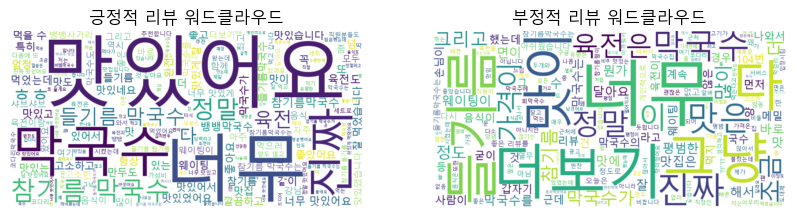

In [24]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 긍정적 리뷰 텍스트 결합
positive_reviews = " ".join(data[data['sentiment'] == '긍정적']['Review'].dropna())

# 부정적 리뷰 텍스트 결합
negative_reviews = " ".join(data[data['sentiment'] == '부정적']['Review'].dropna())

# 한글 폰트 경로 설정 (사용할 폰트 경로로 변경하세요)
font_path = 'C:/Windows/Fonts/malgun.ttf'  # Windows에서 맑은 고딕 폰트 경로 예시입니다.

# 1. 부정적 단어 목록 필터링
negative_words = ['나쁘다', '불만족', '싫다', '불편', '부족', '실망', '짜증', '힘들다', '불쾌', '최악']
negative_reviews_filtered = " ".join([word for word in negative_reviews.split() if word in negative_words])

# 2. 감정 분석 사전 활용 (단순 가중치 조절)
negative_reviews_emphasized = " ".join([word * 3 if word in negative_words else word for word in negative_reviews_filtered.split()])

# 3. 부정어 강조
negative_reviews_emphasized = negative_reviews_emphasized.replace("안", "안_안_안").replace("못", "못_못_못").replace("불만", "불만_불만_불만")
negative_reviews_emphasized = negative_reviews_emphasized.replace("없다", "없다_없다_없다").replace("싫다", "싫다_싫다_싫다")

# 빈 텍스트 처리: 필터링 후 텍스트가 비어있으면 원래 부정적 리뷰 텍스트 사용
if not negative_reviews_emphasized.strip():
    negative_reviews_emphasized = negative_reviews

# 워드클라우드 생성
wordcloud_positive = WordCloud(width=800, height=400, background_color='white', font_path=font_path).generate(positive_reviews)
wordcloud_negative = WordCloud(width=800, height=400, background_color='white', font_path=font_path).generate(negative_reviews_emphasized)

# 한글 폰트 설정 (matplotlib용)
plt.rc('font', family='Malgun Gothic')  # 폰트 이름이 올바르게 설정되어야 합니다.

# 시각화
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('긍정적 리뷰 워드클라우드')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('부정적 리뷰 워드클라우드')

plt.show()


In [38]:
negative_reviews_df = data[data['sentiment'] == '부정적']
negative_reviews_df

,Date,Review,sentiment
0,2주 전,막국수의 대가🌟🌟🌟🌟🌟\n배가 작은거에 한탄하며 모든 음식을 먹지 못해 슬플 정도....,부정적
11,6달 전,일행은 코다리 막국수를 시키고 저는 들기름 막국수를 시켰어요. 일요일 두시 넘어 방...,부정적
21,8달 전,면이 뚝뚝 끊기는 함량이 높아보여요. 참기름향이 고소한 막국수입니다. 마지막 황태육...,부정적
62,2주 전,맛있다고 하여 불금 저녁시간에 찾아간 가게인데요. 가게 광고 사진 찍느라고 가게가 ...,부정적
89,2년 전,"주변직장인들이 많아서 11시30분이후에가면 매장밖에까지 줄 서있음. 세트가격13,0...",부정적
94,2년 전,평일 점심시간에 늘 웨이팅이 있는 듯합니다. 식당 문 앞에 주문 및 대기신청 시스템...,부정적
106,6달 전,이 동네 물가를 생각하면 가격은 어쩔 수 없음\n맛은 다녀본 중 수준급!,부정적
110,6달 전,가격이 너무 비쌉니다 만이천원 퀄리티가 아닙니다. 좌석 간격도 비좁은데 반찬 셀프...,부정적
112,2년 전,무슨 여길 줄서서 먹어!!\n그냥 주말에 걷다가 더워서 한번 먹는 정도…,부정적
146,5년 전,비빔막국수가 땡겨서 갔는데 보통이었어요!\n일요일인데도 6시가 되자마자 사람이 몰려왔어요,부정적


In [39]:
len(negative_reviews_df)

60

In [40]:
negative_reviews_df.to_csv('negative_reviews.csv', index=False, encoding='utf-8-sig')


In [33]:
# 맛, 가격, 메뉴 키워드 리스트 (위에서 정의한 리스트 사용)
taste_keywords_negative = [
    "맛없다", "싱겁다", "짜다", "쓰다", "상하다", "느끼하다", "맵다", "그을린맛", "질기다",
    "노맛", "존맛탱 반대 (JMT 반대)", "맹맹함", "느끼폭발", "너무 자극적임", "물맛", "너무 평범", 
    "하찮은 맛", "맛없찐", "맛없어서 화남", "딱딱", "냄새", "쫄깃쫄깃", "식감이 좋다", 
    "최애", "윤기", "좔좔", "달달구리", "달달", "프레쉬", "달짝지근",
    "맛있다", "달다", "신선하다", "풍미", "향", "감칠맛", 
    "개운하다", "식감", "질감", "매콤하다", "불맛", "연하다",
    "존맛탱 (JMT)", "맵잘알", "꾸덕꾸덕", "촉촉+바삭", "단짠단짠", 
    "겉바속촉", "중독성 있음", "깔끔한 맛", "고소함 폭발", "화끈한 매운맛",
    "밸런스", "풍부함", "크리미함", "톡쏘는 맛", "쫄깃쫄깃", "식감이 좋다", 
    "최애", "존맛", "윤기", "좔좔", "신선", "달달구리", "달달", 
    "프레쉬", "아삭", "감동", "지려요", "지립니다", "달짝지근"
]

price_keywords_negative = [
    "비싸다", "비싼 감", "부적절한 가격", "과하다", "부담된다", "가성비 별로", "돈 아까움", 
    "비싸기만 함", "폭리 느낌", "사치품 가격", "눈탱이 맞은 느낌", "바가지 썼다", 
    "지갑 털림 주의 (but 비추)", "가격 대비 실망", "찐으로 아깝다", "가성비",
    "저렴하다", "가성비", "가격 대비", "합리적", 
    "할인", "이벤트", "돈 값어치",
    "가성비 미쳤다", "가심비 값", "가오픈 특가", "갓성비", "지갑 털림주의", 
    "눈물의 가격", "소확행 소비", "명품급 가격", "한정판 느낌", "가성비"
]

menu_keywords_negative = [
    "메뉴 부족", "알레르기 유발", "음식 양 적다", "사진이랑 다름", "비주얼 낚임", "최악의 메뉴", 
    "한 번만 먹고 끝", "입맛에 안 맞음", "리필 불가", "구성 불만족", "차라리 집밥", "비건 불친절",
    "다양한 메뉴", "시그니처 메뉴", "대표 메뉴", "추천 메뉴", 
    "인기 메뉴", "신메뉴", "계절 메뉴", "사이드 메뉴", 
    "메뉴 설명", "음식 양 많다", "구성", "세트 메뉴", 
    "비건", "글루텐 프리", "식단", "건강 메뉴",
    "인생 메뉴", "입덕 메뉴", "시그니처템", "인스타 감성", "비주얼 끝판왕",
    "혼밥 각", "꼭 먹어야 할 메뉴", "최애 메뉴", "리미티드 에디션"
]

# 각 리뷰가 맛, 가격, 메뉴 중 어느 항목과 관련 있는지 판별하는 함수
def categorize_review(review):
    review = review.lower()  # 소문자로 변환하여 비교
    if any(keyword in review for keyword in taste_keywords_negative):
        return '맛'
    elif any(keyword in review for keyword in price_keywords_negative):
        return '가격'
    elif any(keyword in review for keyword in menu_keywords_negative):
        return '메뉴'
    else:
        return '기타'  # 어느 카테고리에도 속하지 않는 경우

# 'Category' 컬럼 생성하여 부정적 리뷰의 카테고리를 표시
negative_reviews_df.loc[:, 'Category'] = negative_reviews_df['Review'].apply(categorize_review)
negative_reviews_df


C:\Users\5-11\AppData\Local\Temp\ipykernel_10356\611605428.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_reviews_df.loc[:, 'Category'] = negative_reviews_df['Review'].apply(categorize_review)


,Date,Review,sentiment,Category
0,2주 전,막국수의 대가🌟🌟🌟🌟🌟\n배가 작은거에 한탄하며 모든 음식을 먹지 못해 슬플 정도....,부정적,기타
11,6달 전,일행은 코다리 막국수를 시키고 저는 들기름 막국수를 시켰어요. 일요일 두시 넘어 방...,부정적,기타
21,8달 전,면이 뚝뚝 끊기는 함량이 높아보여요. 참기름향이 고소한 막국수입니다. 마지막 황태육...,부정적,맛
62,2주 전,맛있다고 하여 불금 저녁시간에 찾아간 가게인데요. 가게 광고 사진 찍느라고 가게가 ...,부정적,맛
89,2년 전,"주변직장인들이 많아서 11시30분이후에가면 매장밖에까지 줄 서있음. 세트가격13,0...",부정적,기타
94,2년 전,평일 점심시간에 늘 웨이팅이 있는 듯합니다. 식당 문 앞에 주문 및 대기신청 시스템...,부정적,기타
106,6달 전,이 동네 물가를 생각하면 가격은 어쩔 수 없음\n맛은 다녀본 중 수준급!,부정적,기타
110,6달 전,가격이 너무 비쌉니다 만이천원 퀄리티가 아닙니다. 좌석 간격도 비좁은데 반찬 셀프...,부정적,기타
112,2년 전,무슨 여길 줄서서 먹어!!\n그냥 주말에 걷다가 더워서 한번 먹는 정도…,부정적,기타
146,5년 전,비빔막국수가 땡겨서 갔는데 보통이었어요!\n일요일인데도 6시가 되자마자 사람이 몰려왔어요,부정적,기타


In [35]:
negative_reviews_df['Category'].value_counts()

Category
기타    48
맛      9
가격     3
Name: count, dtype: int64

In [31]:
pip install konlpy


  Using cached konlpy-0.6.0-py2.py3-none-any.whl.metadata (1.9 kB)
Using cached konlpy-0.6.0-py2.py3-none-any.whl (19.4 MB)
   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   ---------------------------------------- 3.8/3.8 MB 45.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [37]:
from konlpy.tag import Okt

# 형태소 분석기 생성
okt = Okt()

# 맛, 가격, 메뉴 키워드 리스트 정의
taste_keywords_negative = [
    "맛없다", "싱겁다", "짜다", "쓰다", "상하다", "느끼하다", "맵다", "그을린맛", "질기다",
    "노맛", "존맛탱 반대 (JMT 반대)", "맹맹함", "느끼폭발", "너무 자극적임", "물맛", "너무 평범", 
    "하찮은 맛", "맛없찐", "맛없어서 화남", "딱딱", "냄새", "쫄깃쫄깃", "식감이 좋다", 
    "최애", "윤기", "좔좔", "달달구리", "달달", "프레쉬", "달짝지근",
    "맛있다", "달다", "신선하다", "풍미", "향", "감칠맛", 
    "개운하다", "식감", "질감", "매콤하다", "불맛", "연하다",
    "존맛탱 (JMT)", "맵잘알", "꾸덕꾸덕", "촉촉+바삭", "단짠단짠", 
    "겉바속촉", "중독성 있음", "깔끔한 맛", "고소함 폭발", "화끈한 매운맛",
    "밸런스", "풍부함", "크리미함", "톡쏘는 맛", "쫄깃쫄깃", "식감이 좋다", 
    "최애", "존맛", "윤기", "좔좔", "신선", "달달구리", "달달", 
    "프레쉬", "아삭", "감동", "지려요", "지립니다", "달짝지근"
]

price_keywords_negative = [
    "비싸다", "비싼 감", "부적절한 가격", "과하다", "부담된다", "가성비 별로", "돈 아까움", 
    "비싸기만 함", "폭리 느낌", "사치품 가격", "눈탱이 맞은 느낌", "바가지 썼다", 
    "지갑 털림 주의 (but 비추)", "가격 대비 실망", "찐으로 아깝다", "가성비",
    "저렴하다", "가성비", "가격 대비", "합리적", 
    "할인", "이벤트", "돈 값어치",
    "가성비 미쳤다", "가심비 값", "가오픈 특가", "갓성비", "지갑 털림주의", 
    "눈물의 가격", "소확행 소비", "명품급 가격", "한정판 느낌", "가성비"
]
menu_keywords_negative = [
    "메뉴 부족", "알레르기 유발", "음식 양 적다", "사진이랑 다름", "비주얼 낚임", "최악의 메뉴", 
    "한 번만 먹고 끝", "입맛에 안 맞음", "리필 불가", "구성 불만족", "차라리 집밥", "비건 불친절",
    "다양한 메뉴", "시그니처 메뉴", "대표 메뉴", "추천 메뉴", 
    "인기 메뉴", "신메뉴", "계절 메뉴", "사이드 메뉴", 
    "메뉴 설명", "음식 양 많다", "구성", "세트 메뉴", 
    "비건", "글루텐 프리", "식단", "건강 메뉴",
    "인생 메뉴", "입덕 메뉴", "시그니처템", "인스타 감성", "비주얼 끝판왕",
    "혼밥 각", "꼭 먹어야 할 메뉴", "최애 메뉴", "리미티드 에디션"
]
# 키워드를 형태소 분석하여 분리
taste_keywords_morphs = [okt.morphs(keyword) for keyword in taste_keywords_negative]
price_keywords_morphs = [okt.morphs(keyword) for keyword in price_keywords_negative]
menu_keywords_morphs = [okt.morphs(keyword) for keyword in menu_keywords_negative]

# 리뷰가 어떤 카테고리에 해당하는지 판별하는 함수 (형태소 분석 사용)
def categorize_review(review):
    review_morphs = okt.morphs(review)  # 리뷰 형태소 분석
    
    # '맛' 관련 키워드 비교
    if any(all(morph in review_morphs for morph in keyword) for keyword in taste_keywords_morphs):
        return '맛'
    
    # '가격' 관련 키워드 비교
    elif any(all(morph in review_morphs for morph in keyword) for keyword in price_keywords_morphs):
        return '가격'
    
    # '메뉴' 관련 키워드 비교
    elif any(all(morph in review_morphs for morph in keyword) for keyword in menu_keywords_morphs):
        return '메뉴'
    
    else:
        return '기타'  # 해당하는 키워드가 없을 경우

# 'Category' 컬럼 생성하여 부정적 리뷰의 카테고리를 표시
negative_reviews_df.loc[:, 'Category'] = negative_reviews_df['Review'].apply(categorize_review)
negative_reviews_df

JVMNotFoundException: No JVM shared library file (jvm.dll) found. Try setting up the JAVA_HOME environment variable properly.

In [ ]:
negative_reviews_df['Category'].value_counts()